<a href="https://colab.research.google.com/github/Djinho/EvoNet-CNN-Insight/blob/main/Autophagy_related_Genes/Autophagy_Related_Genes_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Manipulated VCFs to Create ImaGene Objects

- Tested the Autophagy related genes against the models with 70% accuracy (ancient and moderate selection had 69.99% accuracy, so it was included).

### Genes include:
- **ATG13** - associated with SIDS
- **ATG13** - associated with Breast Cancer
- **FIP200** - associated with hypertension
- **ULK1** - associated with Ankylosing spondylitis
- **ULK2** - associated with Asparaginase-associated pancreatitis

### The models used:
1. **Ancient and strong** (post Bayesian optimization, 1st round)
2. **Ancient and moderate** (post Bayesian optimization, 1st round)
3. **Ancient and weak** (post Bayesian optimization, 1st round)
4. **Intermediate and strong** (post Bayesian optimization, 1st round)
5. **Intermediate and moderate** (post Bayesian optimization, 1st round)
6. **Intermediate and weak** (post Bayesian optimization, 1st round)
7. **Recent and strong** (used baseline CNN architecture model)
8. **Recent and moderate** (post Bayesian optimization, 1st round)

*Recent and weak selection was excluded because neither the baseline architecture nor the Bayesian optimization achieved an accuracy near or at 70%.*


In [1]:
import gzip
import shutil
import os

# Directory where your .gz files are located
directory = '/content/'  # Update this if your files are in a different directory

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".gz"):
        # Path to the .gz file
        gz_file_path = os.path.join(directory, filename)

        # Path to the output file (remove the .gz extension)
        output_file_path = os.path.join(directory, filename[:-3])

        # Decompress the file
        with gzip.open(gz_file_path, 'rb') as f_in:
            with open(output_file_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

        print(f"Unzipped: {filename}")

Unzipped: ATG13*S.vcf.gz
Unzipped: FIP200.vcf.gz
Unzipped: ULK2.vcf.gz
Unzipped: ATG13*B.vcf.gz
Unzipped: UKL1.vcf.gz


In [2]:


# Directory where the files are located
directory = '/content/'  # Adjust if needed

# Loop through the files and delete .gz files
for filename in os.listdir(directory):
    if filename.endswith(".gz"):
        file_path = os.path.join(directory, filename)
        os.remove(file_path)
        print(f"Deleted: {filename}")


Deleted: ATG13*S.vcf.gz
Deleted: FIP200.vcf.gz
Deleted: ULK2.vcf.gz
Deleted: ATG13*B.vcf.gz
Deleted: UKL1.vcf.gz


In [3]:
import os
import gzip
import _pickle as pickle

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers, activations, optimizers, regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import CSVLogger
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_curve, auc, precision_recall_fscore_support, confusion_matrix

import itertools
import matplotlib.pyplot as plt
import skimage.transform
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense,Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")


In [4]:
%run -i ImaGene.py

Creating ATG13_B data

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 2243, max 2243, mean 2243.000000, std 0.000000


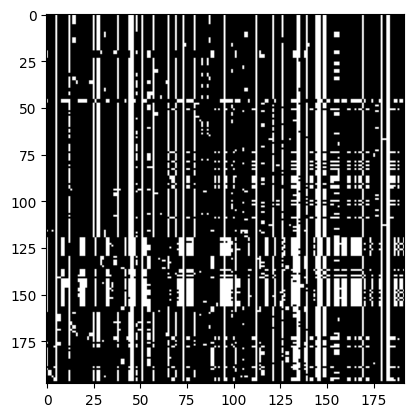

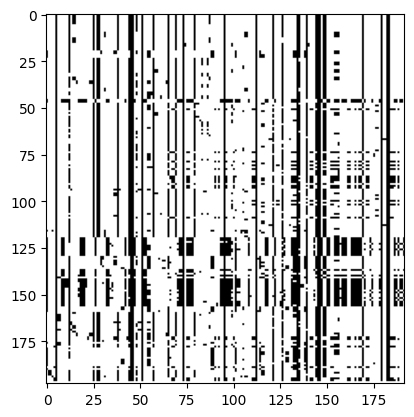

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [5]:
file_ATG13_B = ImaFile(nr_samples=198, VCF_file_name='ATG13_B.vcf')
gene_ATG13_B = file_ATG13_B.read_VCF()
gene_ATG13_B.summary();
gene_ATG13_B.filter_freq(0.01);
gene_ATG13_B.resize((198, 192));
gene_ATG13_B.sort('rows_freq');
gene_ATG13_B.plot();
gene_ATG13_B.convert(flip=True);
gene_ATG13_B.plot();
gene_ATG13_B.summary()

In [6]:

path = './'
gene_ATG13_B.save(file=path + 'ATG13_B');
gene_ATG13_B = load_imagene(file=path + 'ATG13_B');

Creating ATG13_S Data

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 2265, max 2265, mean 2265.000000, std 0.000000


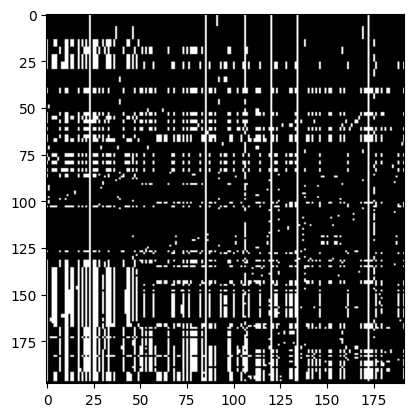

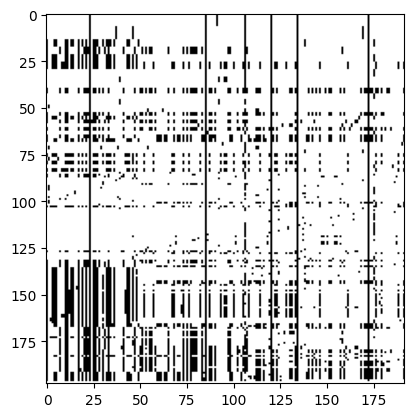

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [10]:
file_ATG13_S = ImaFile(nr_samples=198, VCF_file_name='ATG13_S.vcf')
gene_ATG13_S = file_ATG13_S.read_VCF()
gene_ATG13_S.summary();
gene_ATG13_S.filter_freq(0.01);
gene_ATG13_S.resize((198, 192));
gene_ATG13_S.sort('rows_freq');
gene_ATG13_S.plot();
gene_ATG13_S.convert(flip=True);
gene_ATG13_S.plot();
gene_ATG13_S.summary()

In [11]:

path = './'
gene_ATG13_S.save(file=path + 'ATG13_S');
gene_ATG13_S = load_imagene(file=path + 'ATG13_S');

Creating FIP200

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 2065, max 2065, mean 2065.000000, std 0.000000


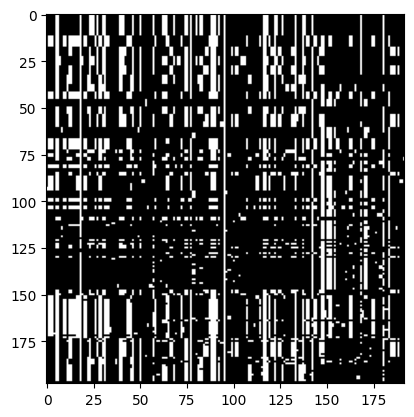

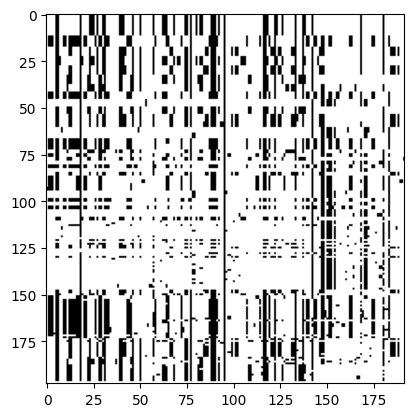

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [12]:
file_FIP200 = ImaFile(nr_samples=198, VCF_file_name='FIP200.vcf')
gene_FIP200 = file_FIP200.read_VCF()
gene_FIP200.summary();
gene_FIP200.filter_freq(0.01);
gene_FIP200.resize((198, 192));
gene_FIP200.sort('rows_freq');
gene_FIP200.plot();
gene_FIP200.convert(flip=True);
gene_FIP200.plot();
gene_FIP200.summary()

In [13]:
path = './'
gene_FIP200.save(file=path + 'FIP200');
gene_FIP200 = load_imagene(file=path + 'FIP200');

Creating UKL1 data

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 2680, max 2680, mean 2680.000000, std 0.000000


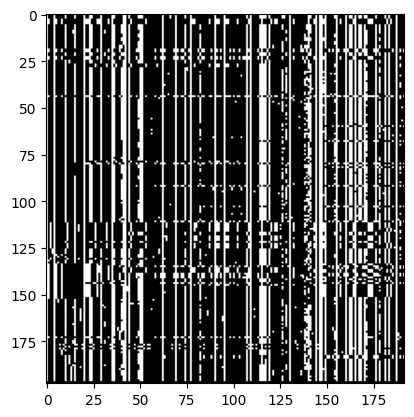

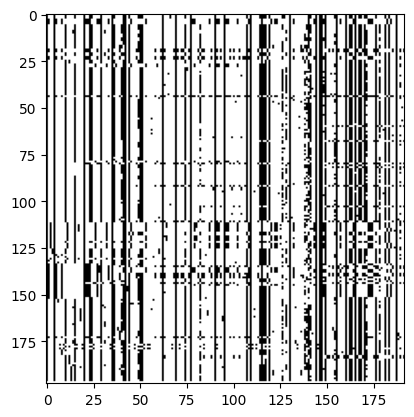

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [14]:
file_ULK1 = ImaFile(nr_samples=198, VCF_file_name='ULK1.vcf')
gene_ULK1 = file_ULK1.read_VCF()
gene_ULK1.summary();
gene_ULK1.filter_freq(0.01);
gene_ULK1.resize((198, 192));
gene_ULK1.sort('rows_freq');
gene_ULK1.plot();
gene_ULK1.convert(flip=True);
gene_ULK1.plot();
gene_ULK1.summary()

In [15]:
path = './'
gene_ULK1.save(file=path + 'ULK1');
gene_ULK1 = load_imagene(file=path + 'ULK1');

Creating ULK2 data

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 2291, max 2291, mean 2291.000000, std 0.000000


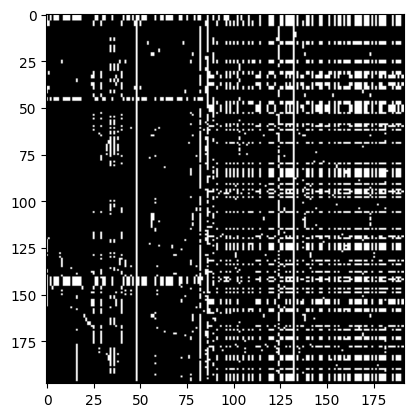

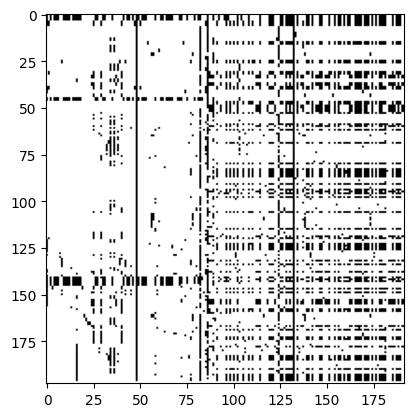

An object of 1 image(s)
Rows: min 198, max 198, mean 198.000000, std 0.000000
Columns: min 192, max 192, mean 192.000000, std 0.000000


0

In [16]:
file_ULK2 = ImaFile(nr_samples=198, VCF_file_name='ULK2.vcf')
gene_ULK2 = file_ULK2.read_VCF()
gene_ULK2.summary();
gene_ULK2.filter_freq(0.01);
gene_ULK2.resize((198, 192));
gene_ULK2.sort('rows_freq');
gene_ULK2.plot();
gene_ULK2.convert(flip=True);
gene_ULK2.plot();
gene_ULK2.summary()

In [17]:
path = './'
gene_ULK1.save(file=path + 'ULK2');
gene_ULK1 = load_imagene(file=path + 'ULK2');

Testing the Autophagy-related genes for selection

Ancient and strong selection

In [19]:
# Define the path to your model
model_path = '/content/drive/My Drive/models/AS_Bayes_opt.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Make predictions and print results for each gene
print("Prediction for gene_ATG13_S:", model.predict(gene_ATG13_S.data, batch_size=None)[0][0])
print("Prediction for gene_ATG13_B:", model.predict(gene_ATG13_B.data, batch_size=None)[0][0])
print("Prediction for gene_FIP200:", model.predict(gene_FIP200.data, batch_size=None)[0][0])
print("Prediction for gene_ULK1:", model.predict(gene_ULK1.data, batch_size=None)[0][0])
print("Prediction for gene_ULK2:", model.predict(gene_ULK2.data, batch_size=None)[0][0])




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Prediction for gene_ATG13_S: 0.5366215
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction for gene_ATG13_B: 0.834614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Prediction for gene_FIP200: 0.8468514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction for gene_ULK1: 0.77563673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction for gene_ULK2: 0.032634582


Ancient and moderate selection

In [20]:
# Define the path to your model
model_path = '/content/drive/My Drive/models/AM_Bayes_opt.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Make predictions and print results for each gene
print("Prediction for gene_ATG13_S:", model.predict(gene_ATG13_S.data, batch_size=None)[0][0])
print("Prediction for gene_ATG13_B:", model.predict(gene_ATG13_B.data, batch_size=None)[0][0])
print("Prediction for gene_FIP200:", model.predict(gene_FIP200.data, batch_size=None)[0][0])
print("Prediction for gene_ULK1:", model.predict(gene_ULK1.data, batch_size=None)[0][0])
print("Prediction for gene_ULK2:", model.predict(gene_ULK2.data, batch_size=None)[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
Prediction for gene_ATG13_S: 0.53710914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction for gene_ATG13_B: 0.4977724
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction for gene_FIP200: 0.5076322
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction for gene_ULK1: 0.41638795
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction for gene_ULK2: 0.38088205


Ancient and weak selection

In [21]:
# Define the path to your model
model_path = '/content/drive/My Drive/models/AW_Bayes_opt.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Make predictions and print results for each gene
print("Prediction for gene_ATG13_S:", model.predict(gene_ATG13_S.data, batch_size=None)[0][0])
print("Prediction for gene_ATG13_B:", model.predict(gene_ATG13_B.data, batch_size=None)[0][0])
print("Prediction for gene_FIP200:", model.predict(gene_FIP200.data, batch_size=None)[0][0])
print("Prediction for gene_ULK1:", model.predict(gene_ULK1.data, batch_size=None)[0][0])
print("Prediction for gene_ULK2:", model.predict(gene_ULK2.data, batch_size=None)[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
Prediction for gene_ATG13_S: 0.6976953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Prediction for gene_ATG13_B: 0.90016705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Prediction for gene_FIP200: 0.94673383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction for gene_ULK1: 0.82837623
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction for gene_ULK2: 0.39748147


Intermediate and strong

In [22]:
# Define the path to your model
model_path = '/content/drive/My Drive/models/IS_Bayes_opt.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Make predictions and print results for each gene
print("Prediction for gene_ATG13_S:", model.predict(gene_ATG13_S.data, batch_size=None)[0][0])
print("Prediction for gene_ATG13_B:", model.predict(gene_ATG13_B.data, batch_size=None)[0][0])
print("Prediction for gene_FIP200:", model.predict(gene_FIP200.data, batch_size=None)[0][0])
print("Prediction for gene_ULK1:", model.predict(gene_ULK1.data, batch_size=None)[0][0])
print("Prediction for gene_ULK2:", model.predict(gene_ULK2.data, batch_size=None)[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
Prediction for gene_ATG13_S: 0.50352794
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Prediction for gene_ATG13_B: 0.86717564
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Prediction for gene_FIP200: 0.8670593
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Prediction for gene_ULK1: 0.9567934
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Prediction for gene_ULK2: 0.028076883


Intermediate and moderate

In [23]:
# Define the path to your model
model_path = '/content/drive/My Drive/models/IM_Bayes_opt.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Make predictions and print results for each gene
print("Prediction for gene_ATG13_S:", model.predict(gene_ATG13_S.data, batch_size=None)[0][0])
print("Prediction for gene_ATG13_B:", model.predict(gene_ATG13_B.data, batch_size=None)[0][0])
print("Prediction for gene_FIP200:", model.predict(gene_FIP200.data, batch_size=None)[0][0])
print("Prediction for gene_ULK1:", model.predict(gene_ULK1.data, batch_size=None)[0][0])
print("Prediction for gene_ULK2:", model.predict(gene_ULK2.data, batch_size=None)[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Prediction for gene_ATG13_S: 0.96988183
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction for gene_ATG13_B: 0.9996183
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Prediction for gene_FIP200: 0.9872269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Prediction for gene_ULK1: 0.9894293
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction for gene_ULK2: 0.030068865


Intermediate and weak

In [24]:
# Define the path to your model
model_path = '/content/drive/My Drive/models/IW_Bayes_opt.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Make predictions and print results for each gene
print("Prediction for gene_ATG13_S:", model.predict(gene_ATG13_S.data, batch_size=None)[0][0])
print("Prediction for gene_ATG13_B:", model.predict(gene_ATG13_B.data, batch_size=None)[0][0])
print("Prediction for gene_FIP200:", model.predict(gene_FIP200.data, batch_size=None)[0][0])
print("Prediction for gene_ULK1:", model.predict(gene_ULK1.data, batch_size=None)[0][0])
print("Prediction for gene_ULK2:", model.predict(gene_ULK2.data, batch_size=None)[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Prediction for gene_ATG13_S: 0.08070663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction for gene_ATG13_B: 0.9808137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction for gene_FIP200: 0.9313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction for gene_ULK1: 0.9541935
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction for gene_ULK2: 0.00058152026


Recent and Strong selection

In [25]:
# Define the path to your model
model_path = '/content/drive/My Drive/models/RS_Baseline.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Make predictions and print results for each gene
print("Prediction for gene_ATG13_S:", model.predict(gene_ATG13_S.data, batch_size=None)[0][0])
print("Prediction for gene_ATG13_B:", model.predict(gene_ATG13_B.data, batch_size=None)[0][0])
print("Prediction for gene_FIP200:", model.predict(gene_FIP200.data, batch_size=None)[0][0])
print("Prediction for gene_ULK1:", model.predict(gene_ULK1.data, batch_size=None)[0][0])
print("Prediction for gene_ULK2:", model.predict(gene_ULK2.data, batch_size=None)[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Prediction for gene_ATG13_S: 0.0004986264
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction for gene_ATG13_B: 0.88489115
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction for gene_FIP200: 0.00013225531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction for gene_ULK1: 0.6997462
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction for gene_ULK2: 0.0007647361


Recent and moderate selection

In [26]:
# Define the path to your model
model_path = '/content/drive/My Drive/models/RM_Bayes_opt.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Make predictions and print results for each gene
print("Prediction for gene_ATG13_S:", model.predict(gene_ATG13_S.data, batch_size=None)[0][0])
print("Prediction for gene_ATG13_B:", model.predict(gene_ATG13_B.data, batch_size=None)[0][0])
print("Prediction for gene_FIP200:", model.predict(gene_FIP200.data, batch_size=None)[0][0])
print("Prediction for gene_ULK1:", model.predict(gene_ULK1.data, batch_size=None)[0][0])
print("Prediction for gene_ULK2:", model.predict(gene_ULK2.data, batch_size=None)[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
Prediction for gene_ATG13_S: 0.11559053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Prediction for gene_ATG13_B: 0.14247866
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Prediction for gene_FIP200: 0.16492431
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Prediction for gene_ULK1: 0.017215036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediction for gene_ULK2: 0.031519692


Plotting values

ATG13_S

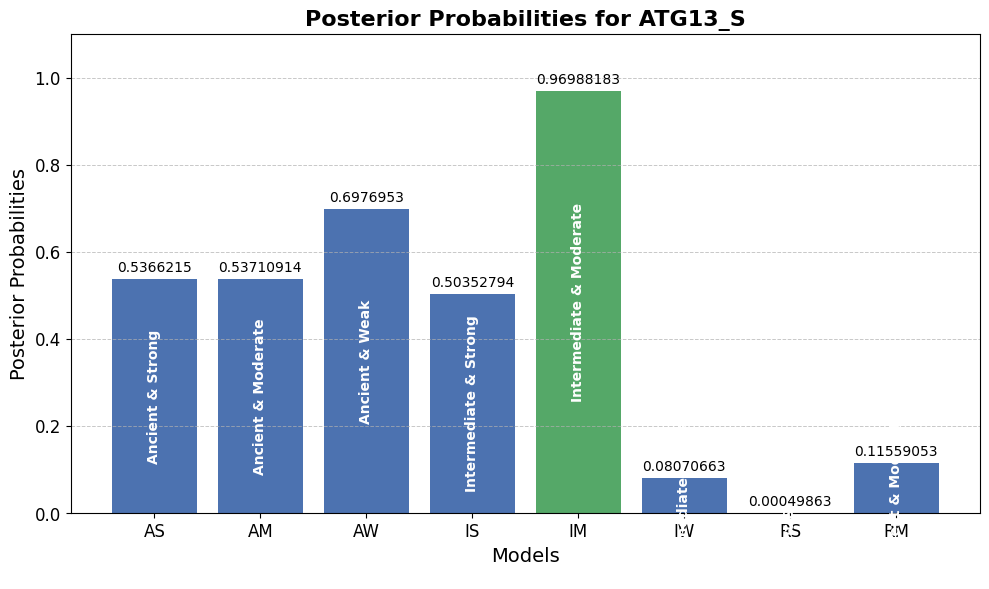

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data with abbreviations and full names
models = [
    'AS',  # Ancient & Strong
    'AM',  # Ancient & Moderate
    'AW',  # Ancient & Weak
    'IS',  # Intermediate & Strong
    'IM',  # Intermediate & Moderate
    'IW',  # Intermediate & Weak
    'RS',  # Recent & Strong
    'RM'   # Recent & Moderate
]

full_names = [
    'Ancient & Strong',
    'Ancient & Moderate',
    'Ancient & Weak',
    'Intermediate & Strong',
    'Intermediate & Moderate',
    'Intermediate & Weak',
    'Recent & Strong',
    'Recent & Moderate'
]

posterior_probabilities = [
    0.5366215,
    0.53710914,
    0.6976953,
    0.50352794,
    0.96988183,
    0.08070663,
    0.0004986264,
    0.11559053
]

# Color highlighting for highest and lowest values
colors = ['#4c72b0'] * len(models)  # A more neutral blue color for all bars
max_index = np.argmax(posterior_probabilities)
min_index = np.argmin(posterior_probabilities)
colors[max_index] = '#55a868'  # Green for the highest value
colors[min_index] = '#c44e52'  # Red for the lowest value

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, posterior_probabilities, color=colors)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Posterior Probabilities', fontsize=14)
plt.title('Posterior Probabilities for ATG13_S', fontsize=16, weight='bold')
plt.ylim(0, 1.1)  # Adjust y-axis limit for better visibility

# Adding full names inside the bars, vertically
for bar, full_name in zip(bars, full_names):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, yval / 2,  # Place in the middle of the bar
        full_name,
        ha='center',
        va='center',
        rotation='vertical',
        fontsize=10,
        color='white',
        weight='bold'
    )
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 8), ha='center', va='bottom', fontsize=10)

# Adding gridlines for a more scientific look
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Enhancing overall style
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()


ATG13_B

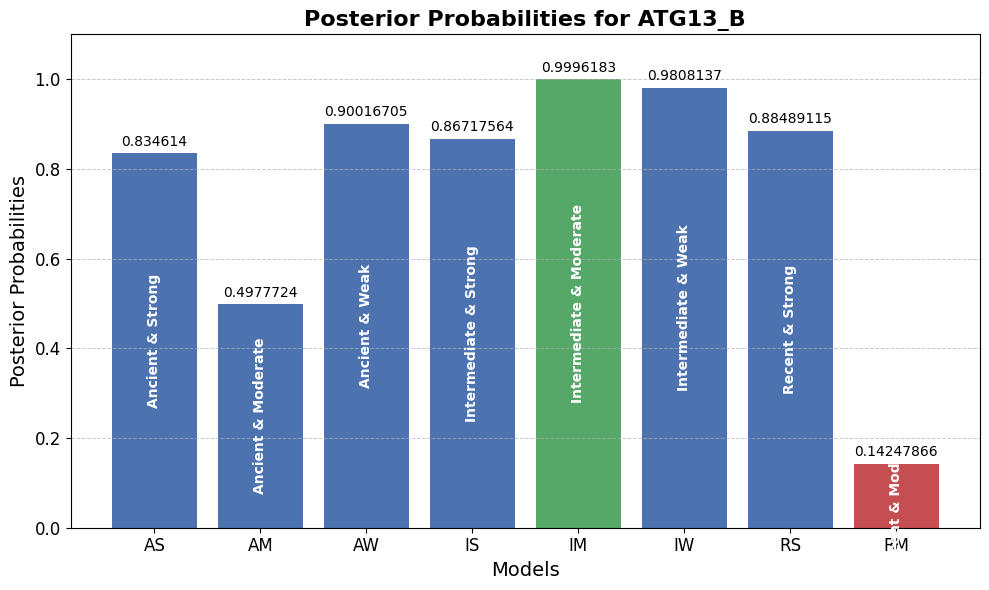

In [28]:


# Data with abbreviations and full names
models = [
    'AS',  # Ancient & Strong
    'AM',  # Ancient & Moderate
    'AW',  # Ancient & Weak
    'IS',  # Intermediate & Strong
    'IM',  # Intermediate & Moderate
    'IW',  # Intermediate & Weak
    'RS',  # Recent & Strong
    'RM'   # Recent & Moderate
]

full_names = [
    'Ancient & Strong',
    'Ancient & Moderate',
    'Ancient & Weak',
    'Intermediate & Strong',
    'Intermediate & Moderate',
    'Intermediate & Weak',
    'Recent & Strong',
    'Recent & Moderate'
]

posterior_probabilities = [
    0.834614,
    0.4977724,
    0.90016705,
    0.86717564,
    0.9996183,
    0.9808137,
    0.88489115,
    0.14247866
]

# Color highlighting for highest and lowest values
colors = ['#4c72b0'] * len(models)  # A more neutral blue color for all bars
max_index = np.argmax(posterior_probabilities)
min_index = np.argmin(posterior_probabilities)
colors[max_index] = '#55a868'  # Green for the highest value
colors[min_index] = '#c44e52'  # Red for the lowest value

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, posterior_probabilities, color=colors)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Posterior Probabilities', fontsize=14)
plt.title('Posterior Probabilities for ATG13_B', fontsize=16, weight='bold')
plt.ylim(0, 1.1)  # Adjust y-axis limit for better visibility

# Adding full names inside the bars, vertically
for bar, full_name in zip(bars, full_names):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, yval / 2,  # Place in the middle of the bar
        full_name,
        ha='center',
        va='center',
        rotation='vertical',
        fontsize=10,
        color='white',
        weight='bold'
    )
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 8), ha='center', va='bottom', fontsize=10)

# Adding gridlines for a more scientific look
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Enhancing overall style
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()


FIP200